# Quantum Circuit Simulators
There are several types of simulators in Qiskit Aer. 
Folloing programs are example of simulators.


In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
from numpy import pi
import numpy as np
shots = 1024

In [2]:
q = QuantumRegister(5)
c = ClassicalRegister(5)
qc = QuantumCircuit(q, c)

In [3]:
# Here is circuit part
for i in range(5):
    qc.h(q[i])

In [4]:
qc.measure(q, c)

## Qasm Simulator
Most basic simulator in qiskit.
This simulator is (perhaps) written by C++.

In [6]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend, shots=shots)
count = job.result().get_counts(qc)
print(count)

{'00111': 37, '10011': 36, '00000': 36, '11011': 34, '11101': 40, '00110': 35, '10100': 39, '10000': 32, '11010': 28, '00101': 28, '10101': 35, '11110': 34, '10001': 37, '00010': 30, '11001': 30, '10111': 29, '01111': 27, '00001': 32, '00100': 39, '10110': 22, '11111': 34, '11100': 28, '01000': 24, '11000': 34, '01010': 32, '01001': 30, '01100': 25, '01101': 21, '01011': 33, '01110': 29, '10010': 25, '00011': 49}


### Visualization
By using plot_histgram(), you can visualize result of execution in qasm simulator.

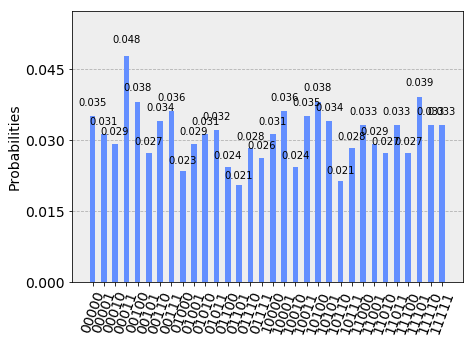

In [7]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(count)

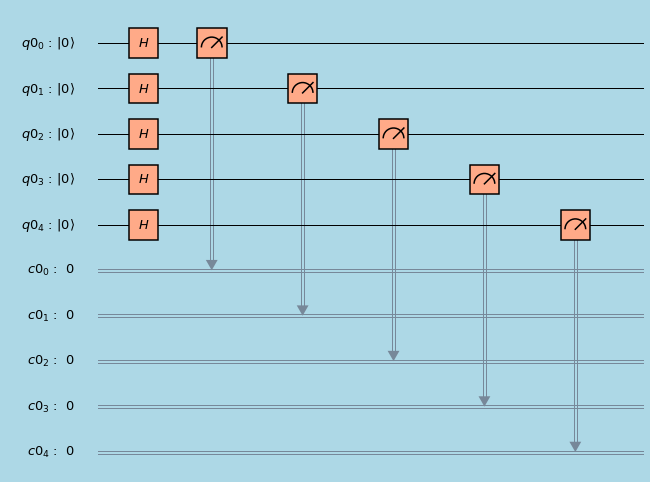

In [8]:
# Another way of drawing circuit.
style={'backgroundcolor':'lightblue', 'gatefacecolor':'#ffaa88'}
qc.draw(output='mpl', style=style)

## State Vector Simulator
State vector simulator is for seeing final state before measurement.
DO NOT measure!

In [9]:
n = 3
q = QuantumRegister(3)
qc = QuantumCircuit(q)

In [10]:
# Here is circuit part
qc.x(q[n-1])
for i in range(2):
    for m in range(n-1, -1, -1):
        for u in range(n-1, -1, -1):
            try:
                qc.cu1(pi/(2**(u)), q[m+u], q[m])
            except:
                continue
        qc.h(q[m])

In [11]:
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend=backend)
result = job.result()
statevector = result.get_statevector(qc)
print(statevector)

[0.  +0.j         0.  +0.j         0.  +0.j         0.  +0.j
 0.25+0.60355339j 0.25-0.10355339j 0.25+0.10355339j 0.25-0.60355339j]


### Visualize
By using plot_state_city(), you can visualize statevector.

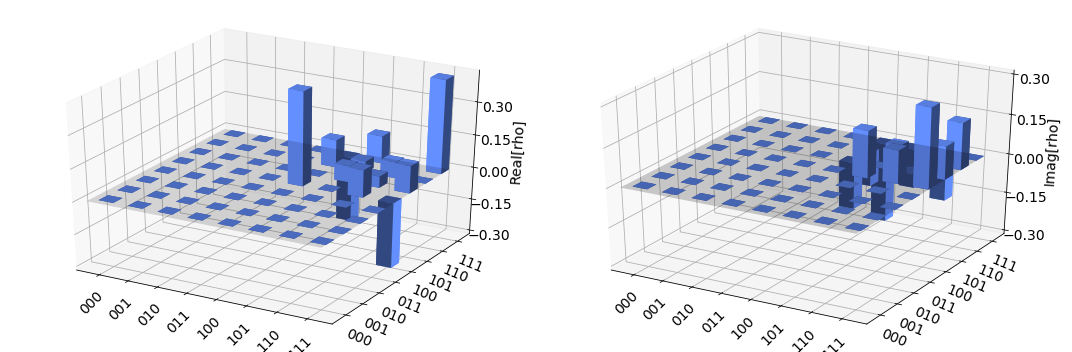

In [12]:
from qiskit.tools.visualization import plot_state_city
plot_state_city(statevector)

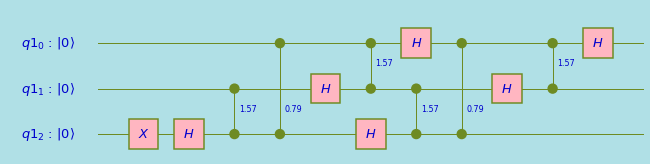

In [13]:
style = {'textcolor':'#0000cd',
'linecolor':'#6e8b23',
'gatetextcolo':'0000cd',
'gatefacecolor':'#ffb6c1',
'barrierfacecolor':'#888888',
'backgroundcolor':'#b0e0e6'}

qc.draw(output="mpl", style=style)

## Unitary Simulator
You can get density matrix of state. 
What is density matrix → https://en.wikipedia.org/wiki/Density_matrix

In [14]:
from pprint import pprint
np.set_printoptions(linewidth=150)
q = QuantumRegister(3)
qc = QuantumCircuit(q)

In [15]:
qc.h(q[0])
qc.cx(q[0], q[1])

In [16]:
backend = Aer.get_backend('unitary_simulator')
job = execute(qc, backend=backend, shots=shots)
result = job.result()
density_matrix = result.get_unitary(qc)
pprint(density_matrix)

array([[ 0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j],
       [ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,  0.70710678+0.j,  0.70710678+0.j,  0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,  0.70710678+0.j, -0.70710678+0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,  0.        +0.j,  0.70710678+0.j,  0.

### Visualize
By using plot_state_city(), you can visualize statevector.

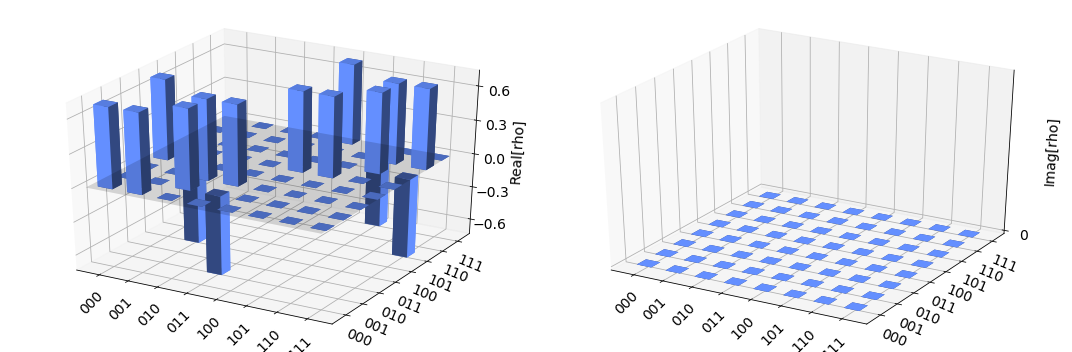

In [17]:
plot_state_city(density_matrix)

## Homework
Research one quantum algorithm and implement it with qiskit.  
Examples of algorithms  
 - (Shor's algorithm)
 - Grover's algorithm　
 - Quantum Teleportation
 - Quantum Fourier Transform and Inverse Fourier Transform(dager QFT)
 - Quantum Walk
 - etc...

If you are in using python and qiskit feel free to ask me!  
contact:  
Slack:@cocori  
Twitter:@cocori_aqua  
facebook:Ryosuke Satoh